In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 0

In [166]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# A

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [168]:
df_describe = df.describe().drop('count')
df_describe

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# B

In [169]:
total_bill_df = df['total_bill'].describe().drop('count')
tip_df = df['tip'].describe().drop('count')
size_df = df['size'].describe().drop('count')

[Text(0.5, 1.0, 'size')]

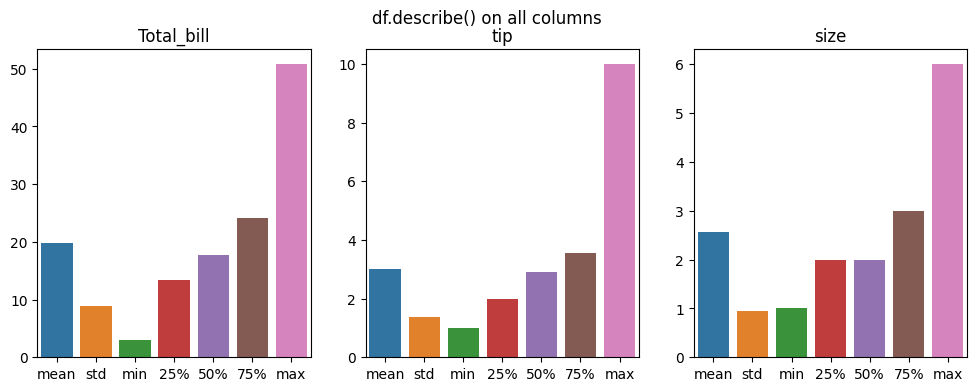

In [170]:
# subplots(1, 3) 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("df.describe() on all columns") # head title for all plots

# axes = plots position as a graph
sns.barplot(ax=axes[0], data=df, x=total_bill_df.index, y=total_bill_df.values).set(title="Total_bill")
sns.barplot(ax=axes[1], data=df,x=tip_df.index, y=tip_df.values).set(title="tip")
sns.barplot(ax=axes[2], data=df,x=size_df.index, y=size_df.values).set(title="size")

# C

<Axes: ylabel='sex'>

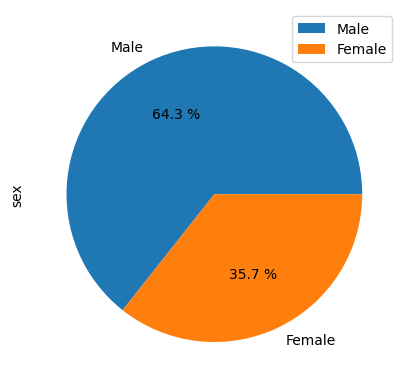

In [171]:
#plt.pie(x=df["sex"].value_counts(), autopct='%.1f %%', legend=True)

df["sex"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', legend=True)

In [172]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [173]:
df_female = df[df['sex']=="Female"]
df_male = df[df['sex']=="Male"]

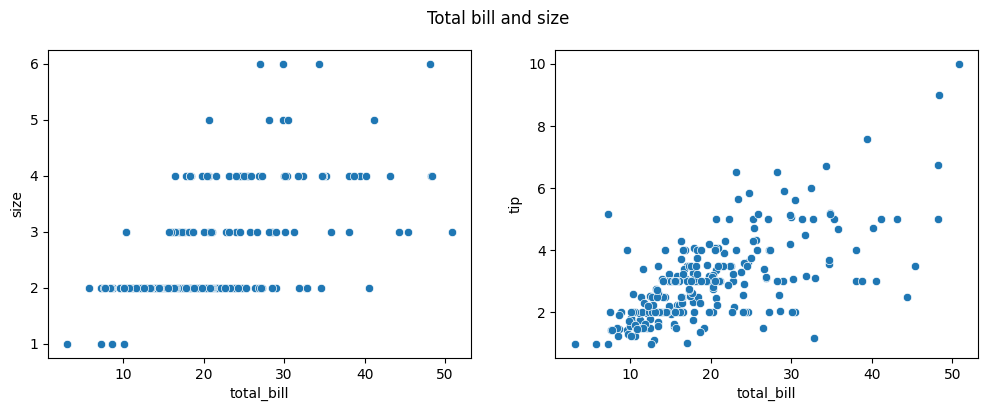

In [174]:
def total_bill_size_plot(df, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title)
    sns.scatterplot(ax=axes[0], data=df, x="total_bill", y="size")
    sns.scatterplot(ax=axes[1], data=df, x="total_bill", y="tip")

total_bill_size_plot(df, "Total bill and size")

[Text(0.5, 1.0, 'Male')]

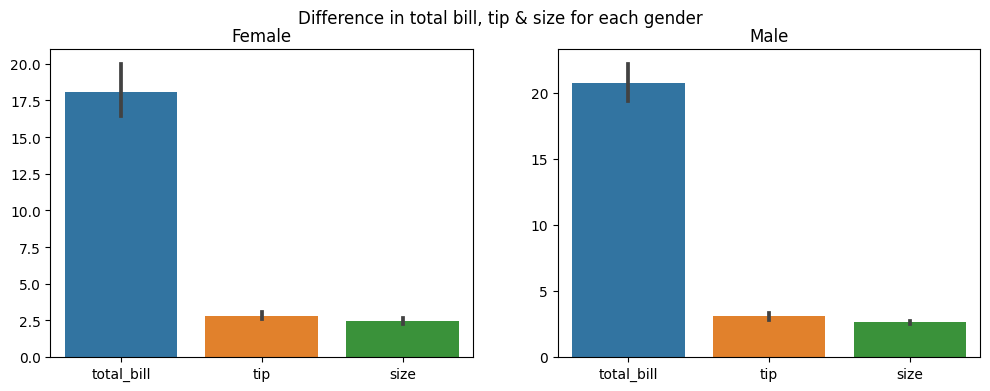

In [175]:
# subplots(1, 3) 1 row, 3 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Difference in total bill, tip & size for each gender") # head title for all plots

# axes = plots position as a graph
sns.barplot(ax=axes[0], data=df_female).set(title="Female")
sns.barplot(ax=axes[1], data=df_male).set(title="Male")

In [176]:
df.head()
# convert categorical data to numerical data
def convert_categorical_to_numerical(df, column):
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes
    return df

convert_categorical_to_numerical(df, "sex")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,No,Sat,Dinner,3
240,27.18,2.00,1,Yes,Sat,Dinner,2
241,22.67,2.00,0,Yes,Sat,Dinner,2
242,17.82,1.75,0,No,Sat,Dinner,2


C:\Users\Danne\AppData\Local\Temp\ipykernel_24296\547288274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


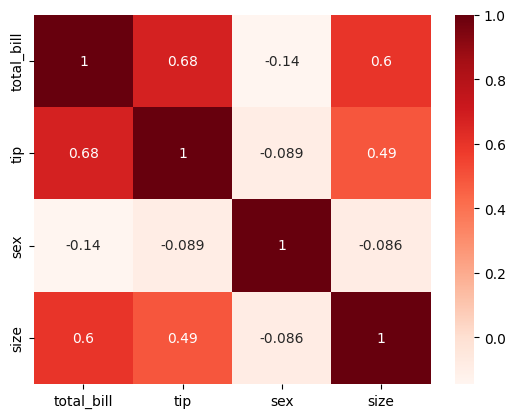

In [177]:
def plot_correlation(df):
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
    plt.show()

plot_correlation(df)

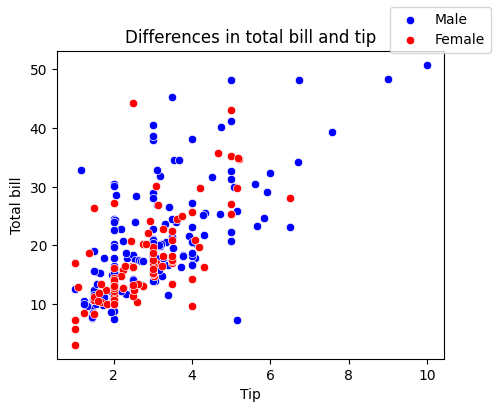

In [178]:
# Create a scatterplot of the tip amount against the total bill for each gender 

def scatterplot_sex_differences():
    fig = plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df_male['tip'], y=df_male['total_bill'], color="blue").set(title="Differences in total bill and tip", xlabel="Tip", ylabel="Total bill")
    sns.scatterplot(x=df_female['tip'], y=df_female['total_bill'], color="red")
    fig.legend(labels=["Male", "Female"])

scatterplot_sex_differences()

# 1. Train|test split

In [179]:
X = df['total_bill']
y = df['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Feature standardization

In [180]:
# Reshape the data
# in order to use the data in the model, we need to reshape it from:
# (n,) to (n, 1)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [181]:
# Feature standardization
# We need to normalize the data and in this case will be using feature standardization

scaler = StandardScaler() # create a scaler object
#scaler.fit(X_train) # fit the scaler to the training data
scaled_X_train = scaler.fit_transform(X_train) # transform the training data
scaled_X_test = scaler.transform(X_test) # transform the testing data

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 1), (74, 1), (170,), (74,))

In [183]:
print(scaled_X_train.mean())
print(scaled_X_test.mean())
print(scaled_X_train.std())
print(scaled_X_test.std())

# do same with y? vet inte exakt vad som står i facit

6.791952621236252e-17
-0.19194537101655185
1.0
0.9213997637553281


In [184]:
print(y_train.mean())
print(scaled_X_test.mean())
print(scaled_X_train.std())
print(scaled_X_test.std())

2.5823529411764707
-0.19194537101655185
1.0
0.9213997637553281


# 3. Polynomial features

In [185]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform the training data
X_train_poly = poly.fit_transform(scaled_X_train)
X_test_poly = poly.transform(scaled_X_test)

# Compare the transormed X_test_poly with X_test_poly2 where X_test_poly2 comes from fitting the polynomial features to X_test_poly and tranforming X_test_poly
X_test_poly2 = poly.fit_transform(X_test_poly)

# Check if the two arrays are equal
np.array_equal(X_test_poly, X_test_poly2)


False

# 4. Polynomial regression

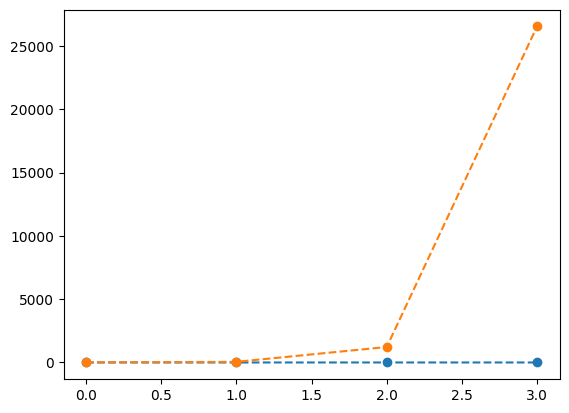

In [197]:

def training_loss_and_test_loss():
    training_loss = []
    test_loss = []

    for i in range(1, 5):
        poly = PolynomialFeatures(degree=i, include_bias=False)
        X_train_poly = poly.fit_transform(scaled_X_train)
        X_test_poly = poly.fit_transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        training_loss.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_loss.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


    plt.plot(training_loss, "--o")
    plt.plot(test_loss, "--o")
    plt.show()

training_loss_and_test_loss()
